Classification Imports

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, roc_curve, auc, classification_report




df = pd.read_csv('dataUsed/data.csv')

df.isna().sum() #check for nan values
df = df.loc[:, ~df.columns.str.contains('^Unnamed')] # removes unamed column (https://stackoverflow.com/questions/43983622/remove-unnamed-columns-in-pandas-dataframe)

df.head()

,Purchase,SUS,Duration,Gender,ASR_Error,Intent_Error
0,1,84,254,0,3,2
1,0,58,247,0,6,9
2,0,56,125,1,6,8
3,0,55,22,0,11,7
4,1,95,262,0,2,3


Variable Assignment

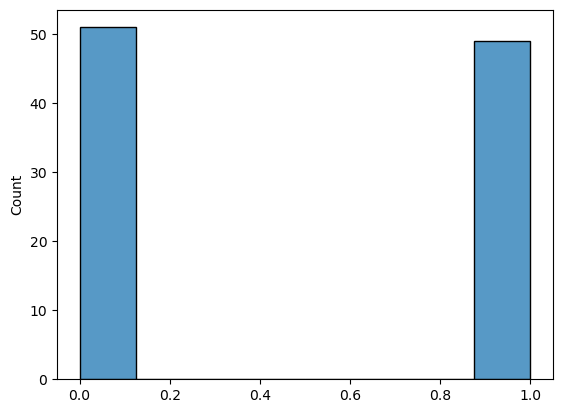

In [15]:
x = df.drop(columns=['Purchase', 'SUS']).to_numpy() # dependent vars
y = df['Purchase'].to_numpy() # independent vars

sns.histplot(data=y, palette='bright')
plt.show()
# display purchase data, nearly even customers did or did not purchase

In [16]:
# data preperation

scale = StandardScaler()
xScale = scale.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(xScale, y, test_size=0.3)


Models

In [18]:
logistic = LogisticRegression()
neighbors = KNeighborsClassifier(n_neighbors=3)
svc = SVC(probability=True)
gauss = GaussianNB()
randomForest = RandomForestClassifier()




logistic.fit(x_train,y_train)
neighbors.fit(x_train,y_train)
svc.fit(x_train,y_train)
gauss.fit(x_train,y_train)
randomForest.fit(x_train,y_train)


RandomForestClassifier()